In [12]:
import pandas as pd
import ast
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_network_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        G = nx.node_link_graph(data)
    return G

file_path = 'data/network_with_attributes.json'
G = load_network_from_json(file_path)

In [5]:
G.nodes(data=True)

NodeDataView({14532: {'name': 'original instant kaffe', 'category': 'kolonial', 'price_amount': 362.38, 'unit': 'Kg.', 'ecology': 'False'}, 18950: {'name': 'vand m. brus citrus', 'category': 'drikkevarer', 'price_amount': 2.52, 'unit': 'L.', 'ecology': 'False'}, 92911: {'name': 'iskaffe espresso', 'category': 'kolonial', 'price_amount': 54.0, 'unit': 'L.', 'ecology': 'False'}, 80009: {'name': 'tripleshot espresso iskaffe 3,3% fedt', 'category': 'mejeri-og-koel', 'price_amount': 46.67, 'unit': 'L.', 'ecology': 'False'}, 76001: {'name': 'danbo ost i skiver mild 45+ øko', 'category': 'mejeri-og-koel', 'price_amount': 90.0, 'unit': 'Kg.', 'ecology': 'True'}, 71568: {'name': 'chokoladesnacks', 'category': 'slik-og-snacks', 'price_amount': 364.42, 'unit': 'Kg.', 'ecology': 'False'}, 61258: {'name': 'cabernet sauvignon', 'category': 'drikkevarer', 'price_amount': 132.0, 'unit': 'L.', 'ecology': 'False'}, 55966: {'name': 'mørk kakaomælk 1,6% fedt', 'category': 'mejeri-og-koel', 'price_amount':

# Motivation
### 1.1 Motivation and selection of data for the study <a id="section_1_1"></a>

This project aims to uncover valuable insights into consumer behavior in Denmark by investigating a network of grocery items frequently purchased together in some of the country’s largest and most well-known grocery stores owned by the [Salling Group](https://www.sallinggroup.com/). Understanding consumer behavior is essential, as it includes a broad and important field that integrates psychology, sociology, economics, and marketing [[1](#chapter5)]. In this project we will investigate this network using a social science approach in order to discover how consumer choices are reflected in what products gets bought together.

The data used in the project includes an id, name, price and a short description of common everyday food-products that is collected using scraping methods on the [BilkaToGo website](https://www.bilkatogo.). The project utilizes the [Salling Group API](https://developer.sallinggroup.com/api-reference) to gather information about items that are frequently bought together by calling for each product id. This particular data was chosen in order to create a network of food-items where an edge between two products occur if they are on the same 'frequently bough together' list. The project will conduct a thoughrough analysis of the network in order to get insights of the networks structure and investigate which types of food-items often land in the same basket and what kind og communities emerge based on what the average consumer decides to buy together when shopping.

The descriptions collected for each product are a small text-pieces of in average around 60 words typically explaining what the product tastes like, and what occasions/setting they are typically enjoyed in. This data is used to conduct a textual analysis using NLP tools to get insights into the communities and label them according to the information they hold. 


### 1.2 The goal for the end user’s experience <a id="section_1_2"></a>

The Boston Consulting Group mentiones in a Danish consumer sentiment series that in 2023 "health was the most important purchasing criterion, with 42% of respondents considering health important when buying food." [[2](#chapter5)]. Additionally they mention that the sustainability trend is prominent in the groceries category, with 21% of consumers finding sustainability important when shopping for groceries. Trough the analysis this project aims to investigate if some of these patterns are recognisable in the network and shed some light on what types of products generally tend to get puchased together. Subsequently a goal is that the analysis will be reflecting consumer behaviors that are recognized in our daily life but also discover patterns we might hadn't initially though of.


[1] Nordic Social. (n.d.). Købsadfærd. Nordic Social. Retrieved May 9, 2024, from https://nordicsocial.dk/kobsadfaerd/ 

[2] Boston Consulting Group. (2023). Danish consumer sentiment series: June 2023. https://web-assets.bcg.com/31/bc/0ebe31544e6bb4cdc22fba83a735/danish-consumer-sentiment-series-june-2023.pdf 

# Discussion:

What went well?
What is still missing? What could be improved? Why?

Through this project, we have gained significant insights into consumer behavior and purchasing patterns within the context of Danish grocery stores. Collecting the relevant data was a challenging task that required the use of new scraping tools and considerable effort. However, the process provided valuable learning opportunities and enhanced our understanding of webscraping.

In the analysis we learned that........ SKRIV EN MASSE



# Degree Distribution with random Network

We calculate p and k for the CSS-network using equation 3.2 from the network science text-book [1]

In [41]:
N = G.number_of_nodes() #8478
L = G.number_of_edges() #23778

p = 2*L/(N*(N-1)) 

#calculate the average degree using p
k = p*(N-1)
print(f'The number of nodes in the Food-network is: {N}')
print(f'The number of links in the Food-network is: {L}')
print(f'The probability of a link between two nodes is: {p}')
print(f'Average degree of the Food-network: {k}')

The number of nodes in the Food-network is: 9755
The number of links in the Food-network is: 74180
The probability of a link between two nodes is: 0.001559217856134302
Average degree of the Food-network: 15.208610968733982


In [9]:
#function to calculate generate random network:
def generate_random_network(node_count, probability):
    random_network = nx.Graph()
    nodes = range(node_count)
    random_network.add_nodes_from(nodes)

    for i in nodes:
        for j in nodes:
            if i < j:
                if np.random.uniform(0, 1) < probability:
                    random_network.add_edge(i, j)

    return random_network

# Generate random network
random_network = generate_random_network(N, p)

In [10]:
# Obtain the degrees of all nodes in the random network and CSS-network
Normal_degrees = [degree for node, degree in random_network.degree()]
Food_degrees = [degree for node, degree in G.degree()]   

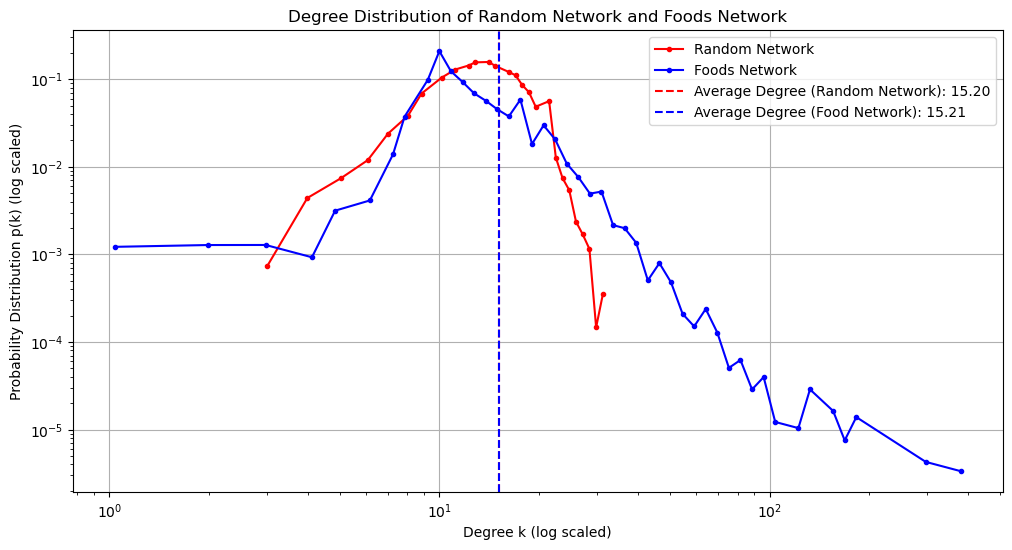

In [21]:
#Visualize the degree distribution of the random network and the CSS-network
# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Define bins using logspace for logarithmic scaling
bins_norm = np.logspace(0, np.log10(max(Normal_degrees)), 75)
bins_food = np.logspace(np.log10(min(Food_degrees)), np.log10(max(Food_degrees)), 75)

# define the degree distribution of the random network
hist_normal, edges_normal = np.histogram(Normal_degrees, bins=bins_norm, density=True)
x_norm = (edges_normal[1:] + edges_normal[:-1]) / 2

# Filter empty bins
xx_norm, yy_norm = zip(*[(i, j) for (i, j) in zip(x_norm, hist_normal) if j > 0])

# define the degree distribution of the Computational Social Scientists network
hist_food, edges_food = np.histogram(Food_degrees, bins=bins_food, density=True)
x_food = (edges_food[1:] + edges_food[:-1]) / 2

# Filter empty bins
xx_food, yy_food = zip(*[(i, j) for (i, j) in zip(x_food, hist_food) if j > 0])

# Plot them
ax.plot(xx_norm, yy_norm, marker='.', label='Random Network', color='r')
ax.plot(xx_food, yy_food, marker='.', label='Foods Network', color='b')

# Calculate average degree for both networks
avg_degree_random = np.mean(Normal_degrees)
avg_degree_food = np.mean(Food_degrees)

# Add vertical lines for average degrees
ax.axvline(avg_degree_random, color='r', linestyle='--', label=f'Average Degree (Random Network): {avg_degree_random:.2f}')
ax.axvline(avg_degree_food, color='b', linestyle='--', label=f'Average Degree (Food Network): {avg_degree_food:.2f}')

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Degree k (log scaled)')
ax.set_ylabel('Probability Distribution p(k) (log scaled)')
ax.set_title('Degree Distribution of Random Network and Foods Network')
#set lengent to upper right corner
ax.legend(loc='upper right')
#ax.legend()

# Show grid
ax.grid(True) 

 
#data_source = "CSS-Network-data loaded from Assignment 1" 
#plt.text(0.7, 0.0, data_source, ha='center', va='bottom', transform=ax.transAxes, fontsize=8)

# Show the plot
plt.show()


In [44]:
import math
print(math.log(N))
print(np.log(N))

9.185535253057212
9.185535253057212


Because < k > > ln(N) we are in the Connected Regime. This means that all components are absorbed by the giant component, resulting in a single connected network [1]


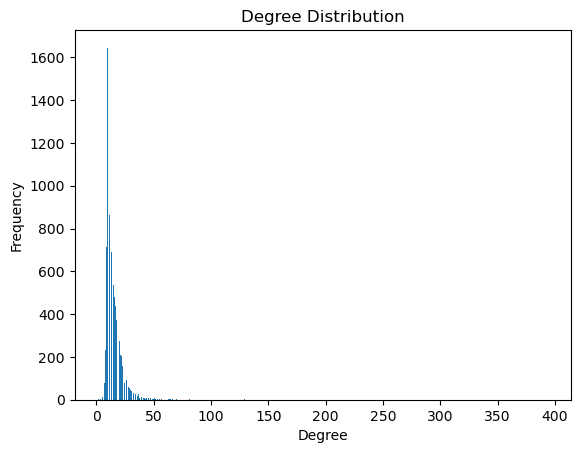

In [22]:
import matplotlib.pyplot as plt

# Calculate the histogram of degree distribution
hist, bins = np.histogram(Food_degrees, bins='auto')

# Plot the degree distribution as a bar chart
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')

# Set the labels and title
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

# Show the plot
plt.show()


# Assorsativity

### Degree Assorsativity

In [47]:
print(f"The degree assosativity coefficient of the food network is: {nx.degree_assortativity_coefficient(G)}")


The degree assosativity coefficient of the food network is: 0.05364441112708626


The degree assorsativity is pretty low 

### Attribute Assorsativity
The Assorsativity coefficient measures the similarity of connections in the graph with respect to the given attribute.

In [48]:
nx.attribute_assortativity_coefficient(G, "category")

0.4944913441563008

In [49]:
nx.attribute_assortativity_coefficient(G, "ecology")

0.5951001229613563

In [51]:
nx.attribute_assortativity_coefficient(G, "price_amount")

0.08718413244317318